# Model Codex Platform Structure

This work attemps to simulate as many details as possible of the Codex platform. The details about the aspects we want to model can be found in the following notes: https://hackmd.io/yTRlMInIRi6fG-nk984ULQ

First, we want to build a model of what we expect the Codex platform to look like, in terms of number of nodes, storage used and available, file size distribution, among others.

Total storage used: 2054.255442 Terabytes
Total storage free: 3081.383163 Terabytes
Total number of blocks in the system: 538510738
Total number of files in the system: 525889


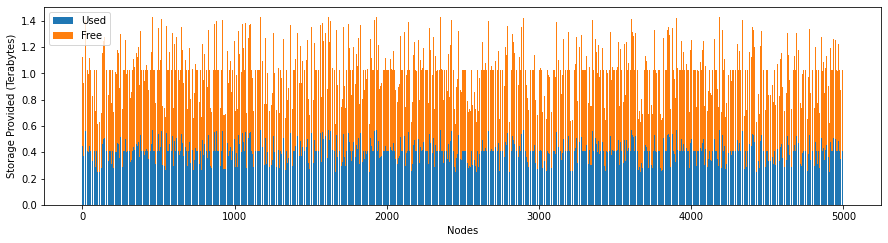

In [ ]:
import numpy as np
import random as random
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 8]


#@title Platform parameters

#@markdown Number of peers in the network
NetworkSize = 5000 #@param {type:"slider", min:1, max:10000, step:1}
#@markdown Total storage provided in the system (Petabytes)
StorageProvided = 5 #@param {type:"slider", min:1, max:100, step:1}
#@markdown Total storage in use (Petabytes)
StorageUsed = 2 #@param {type:"slider", min:1, max:100, step:1}
#@markdown Variance in storage offered by nodes (%)
StorageVariance = 40 #@param {type:"slider", min:1, max:50, step:1}
#@markdown Mean file size (Kilobytes)
MeanFileSize = 4096 #@param {type:"slider", min:1, max:1048576, step:128}
#@markdown Block size for erasure coding (Kilobytes)
BlockSize = 4 #@param {type:"slider", min:1, max:32, step:1}

totalUsed = 0
totalFree = 0
nodesProvided = [0]*NetworkSize
nodesUsed = [0]*NetworkSize
nodesFree = [0]*NetworkSize
for i in range(NetworkSize):
  sign = random.randint(-1,1)
  variance = random.random() * StorageVariance / 100
  nodesProvided[i] = (StorageProvided*1024/NetworkSize)+(sign*variance*(StorageProvided*1024/NetworkSize))
  nodesUsed[i] = (StorageUsed*1024/NetworkSize)+(sign*variance*(StorageUsed*1024/NetworkSize))
  nodesFree[i] = nodesProvided[i] - nodesUsed[i]
  totalUsed += nodesUsed[i]
  totalFree += nodesFree[i]

def plotDist(nodesUsed, nodesFree):
  x = np.arange(len(nodesFree))
  plt.rcParams['figure.figsize'] = [15, 8]
  plt.subplot(211)
  plt.xlabel("Nodes")
  plt.ylabel("Storage Provided (Terabytes)")
  plt.bar(x-1, nodesUsed, label="Used")
  plt.bar(x-1, nodesFree, label="Free", bottom=nodesUsed)
  plt.legend(loc="upper left")

 
print("Total storage used: %f Terabytes" % totalUsed)
print("Total storage free: %f Terabytes" % totalFree)
print("Total number of blocks in the system: %i" % (totalUsed*1024*1024/BlockSize)) 
print("Total number of files in the system: %i" % (totalUsed*1024*1024/MeanFileSize)) 
plotDist(nodesUsed, nodesFree)

# Failure Model

Here we try to capture the most common type of failures and their impact in the system.

In [ ]:
#@title Failure model parameters

#@markdown Annual Failure Rate (% of network nodes down per year)
AnnualFailureRate = 3 #@param {type:"slider", min:1, max:10, step:1}
#@markdown Number of correlated failures event per year
CorrelatedFailureEvents = 1 #@param {type:"slider", min:0, max:10, step:1}
#@markdown Number of nodes affected by correlated failures 
CorrelatedFailureImpact = 100 #@param {type:"slider", min:2, max:1000, step:1}

AnnualNodesFailed = NetworkSize*AnnualFailureRate/100
MeanTimeBetweenFailures = 365*24/AnnualNodesFailed

print("Number of nodes failed per year: %i" % AnnualNodesFailed)
print("Mean time between failures: %i hours" % MeanTimeBetweenFailures)

Number of nodes failed per year: 150
Mean time between failures: 58 hours
